In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [19]:
import glob

In [20]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/train/results.csv')
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/train/results.csv')
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/train/results.csv')
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/train/results.csv')

In [21]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

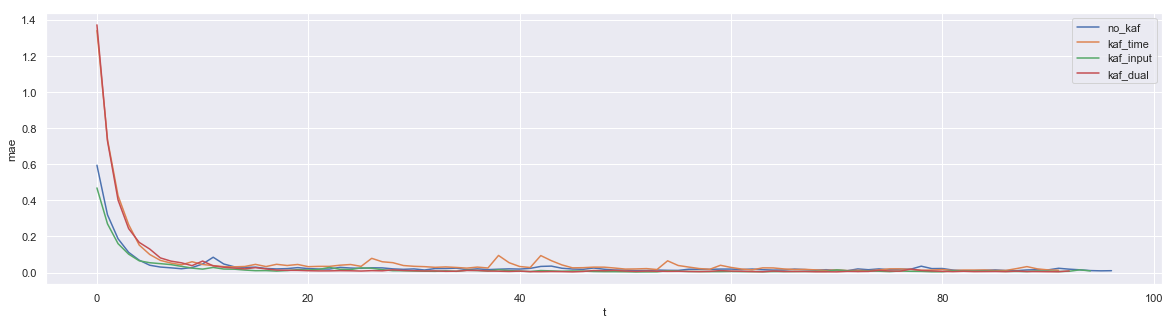

In [22]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

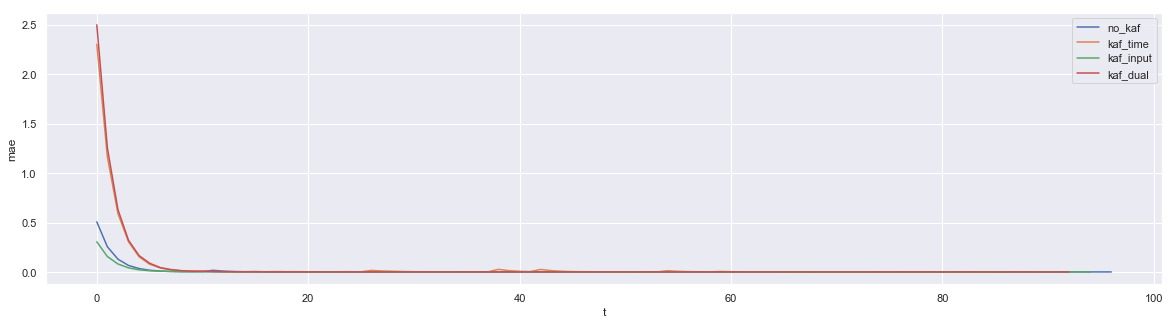

In [23]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [24]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

In [31]:
header = table.index.tolist()

In [47]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/test/results.csv', names=header)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/test/results.csv', names=header)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/test/results.csv', names=header)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/test/results.csv', names=header)

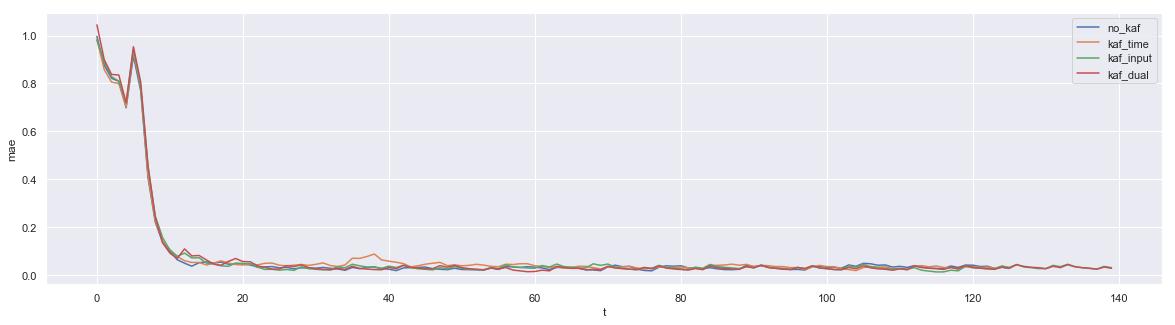

In [48]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [49]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [50]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.075816,6.400975,0.058476,0.075816,0.121466,0.075816,17.034115
kaf_time,0.082627,7.128008,0.058311,0.082627,0.138406,0.082627,24.267912
kaf_input,0.073080,7.260985,0.062082,0.073080,0.106362,0.073080,14.159843
kaf_dual,0.072792,7.914334,0.062709,0.072792,0.106972,0.072792,13.012846


In [52]:
df_no_kaf = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-15/report/89745_report.csv', index_col=0)
df_kaf_time = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-33/report/89709_report.csv', index_col=0)
df_kaf_input = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-46-53/report/89721_report.csv', index_col=0)
df_kaf_dual = pd.read_csv('../logs/darnn/ntsa-2018-12-11-08-47-13/report/89725_report.csv', index_col=0)

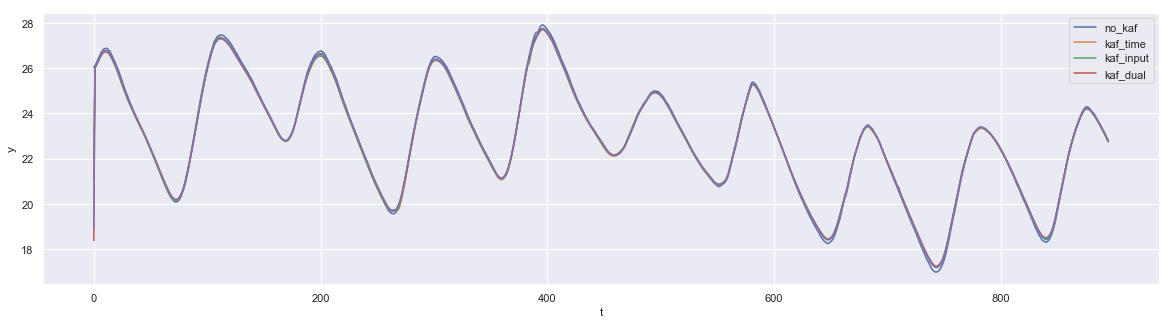

In [53]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [54]:
from ntsa.utils.misc import regr_metrics

In [55]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [56]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [57]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,0.036710,0.087308,0.003773,0.381044
time,0.028201,0.085596,0.003776,0.380016
input,0.074290,0.082750,0.003757,0.384102
dual,0.065735,0.080574,0.003612,0.368494
